Desafio:

Precisamos que você crie um repositório no github ou gitlab e inicie um projeto para o problema que vai ser apresentado a seguir. Pode colocar nesse repositório seu código em Python ou um jupyter notebook. É importante que adicione em seu README os passos necessários para que possamos executar e verificar sua implementação. Tendo em mente a base de dados Bias correction of numerical prediction model temperature forecast Data Set (https://archive.ics.uci.edu/ml/datasets/Bias+correction+of+numerical+prediction+model+temperature+forecast) da UCI, queremos que você faça uma análise descritiva dos dados explicando aspectos fundamentais, tais como a distribuição dos dados e correlação entre as variáveis. Fique a vontade para fazer sugestões, alterações e transformações que achar necessárias a fim de facilitar o entendimento do problema.

Além da análise descritiva, queremos que você treine e avalie um modelo de Machine Learning para fazer a estimação da variável Next_Tmax, explicando a qualidade do modelo a partir das métricas de avaliação utilizadas. Como métricas de avaliação, sugerimos como obrigatórias a accuracy, precision e recall. Mas você fica livre de avaliar outras métricas que sejam oportunas de acordo com seu julgamento e necessidade na avaliação do modelo. Queremos que você nos mostre o que fez no código, mas também explique suas decisões e conclusões, pode gerar gráficos ou outras visualizações para auxiliar em sua explicação. Queremos ver também sua linha de raciocínio.

Por fim, queremos ouvir de você o que poderia ser feito de diferente se tivesse mais tempo e mais recursos. Quais outros testes e análises poderiam ser feitas e qual a importância destas.

Não é necessário pensar nesse momento em eficiência ou otimização de código e modelos, mas se considerar oportuno, pode adicionar esse tópico em sua análise. Fique à vontade para determinar o que é relevante.

Nós precisamos receber a sua solução até o dia 13/01/2022. Em caso de algum imprevisto fique à vontade para nos sinalizar, tudo bem? 

Em cópia do e-mail está o @Vitor Casadei em caso de possíveis dúvidas em relação ao desafio.

In [1]:
import os, sys, glob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
from seaborn import pairplot

In [3]:
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [4]:
arqs={ n:nome for n,nome in enumerate(glob.glob('*.csv')) }
arqs

{0: 'Bias_correction_ucl.csv'}

In [5]:
df = pd.read_csv(arqs[0], sep=',')

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
df = df.loc[~df['Next_Tmax'].isnull()]

In [9]:
df['Next_Tmax']= df['Next_Tmax'].apply(lambda x: int(round(x)))

In [10]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7723.000000,7665.000000,7665.000000,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,...,7650.000000,7650.000000,7650.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000
mean,13.008157,29.769563,23.224631,56.741402,88.369140,29.616253,23.511807,7.096739,62.468599,0.368482,...,0.484298,0.277121,0.269440,37.544755,126.991370,61.926856,1.258725,5342.066031,30.273657,22.932220
std,7.214034,2.970766,2.414959,14.654953,7.199065,2.946612,2.345402,2.182457,33.720451,0.262328,...,1.761169,1.158092,1.205851,0.050386,0.079347,54.331701,1.371331,429.235277,3.142801,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.000000,11.300000
25%,7.000000,27.800000,21.700000,45.961137,84.212961,27.675091,22.088261,5.678962,37.227417,0.146551,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.000000,21.300000
50%,13.000000,29.900000,23.400000,55.017689,89.792492,29.705437,23.758249,6.547838,56.854134,0.315185,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5437.534180,30.000000,23.100000
75%,19.000000,32.000000,24.900000,67.154766,93.743328,31.710506,25.153721,8.030117,84.223234,0.573970,...,0.017952,0.007882,0.000045,37.577600,127.042000,59.832400,1.767800,5728.624512,33.000000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,39.000000,29.800000


<AxesSubplot:xlabel='Next_Tmax', ylabel='count'>

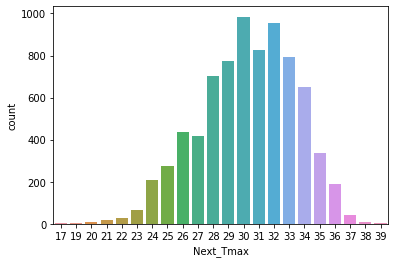

In [11]:
srn.countplot(df['Next_Tmax'])

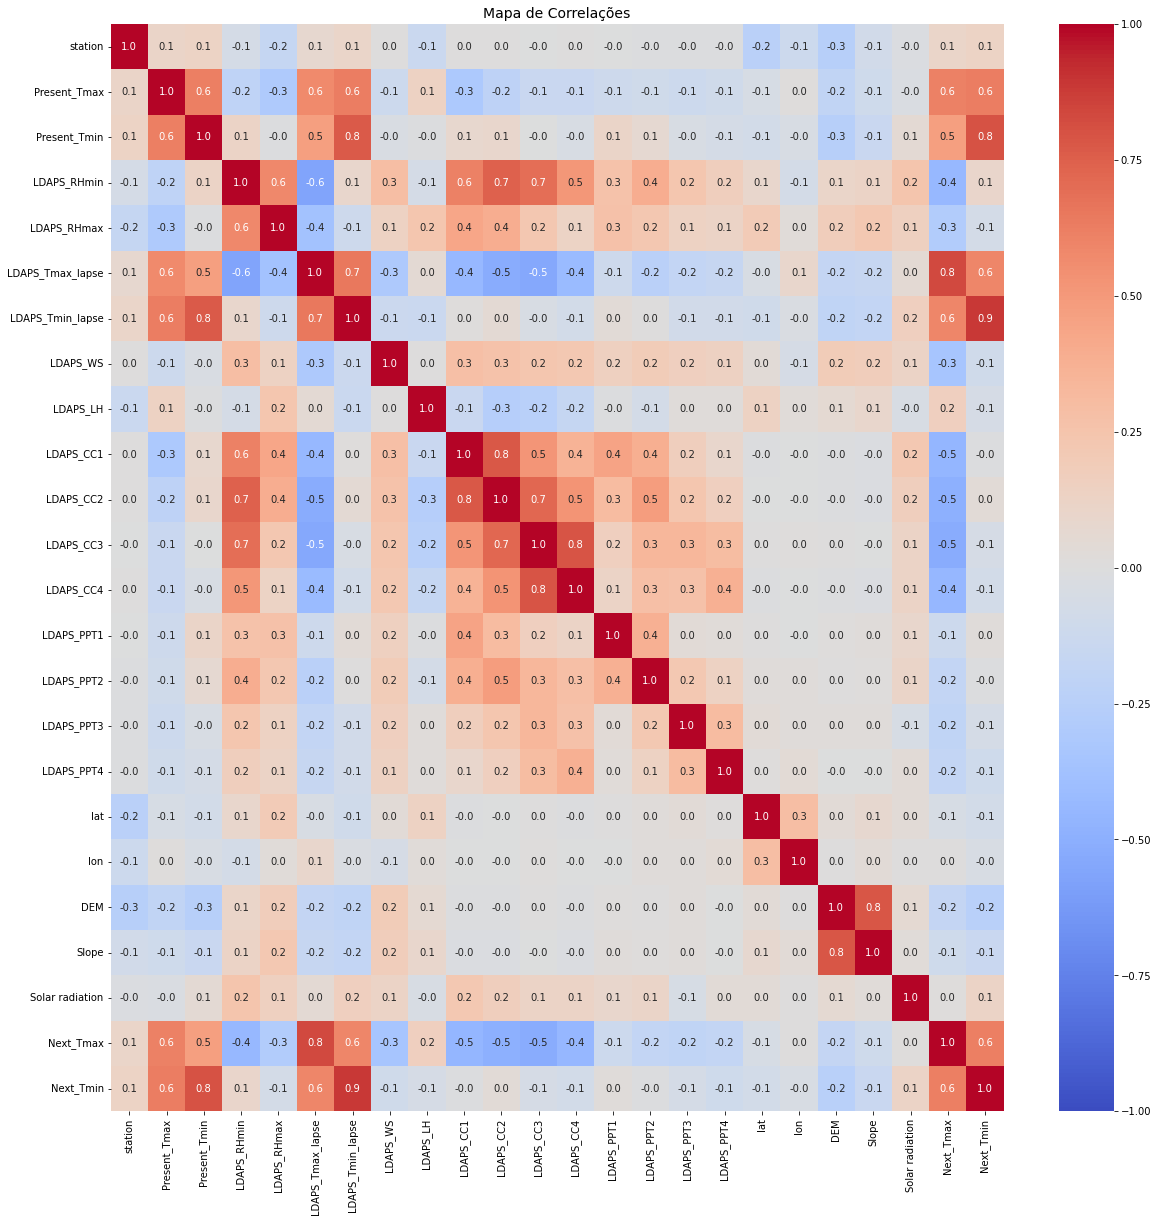

In [12]:
f, ax = plt.subplots(figsize = (20,20))
srn.heatmap(df.corr(), annot=True, fmt='.1f',
            ax=ax, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de Correlações', size=14);

In [13]:
flt = np.abs(df.corr()['Next_Tmax']) > .59

In [14]:
flt

station             False
Present_Tmax         True
Present_Tmin        False
LDAPS_RHmin         False
LDAPS_RHmax         False
LDAPS_Tmax_lapse     True
LDAPS_Tmin_lapse     True
LDAPS_WS            False
LDAPS_LH            False
LDAPS_CC1           False
LDAPS_CC2           False
LDAPS_CC3           False
LDAPS_CC4           False
LDAPS_PPT1          False
LDAPS_PPT2          False
LDAPS_PPT3          False
LDAPS_PPT4          False
lat                 False
lon                 False
DEM                 False
Slope               False
Solar radiation     False
Next_Tmax            True
Next_Tmin            True
Name: Next_Tmax, dtype: bool

In [15]:
corr_feat = df.corr().columns[flt].tolist()

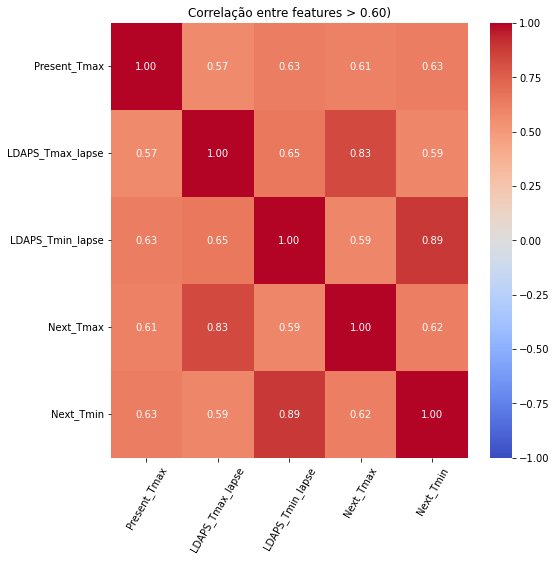

In [16]:
f, ax = plt.subplots(figsize = (8,8))
srn.heatmap(df[corr_feat].corr(), annot=True, fmt='.2f',
           ax=ax, cmap='coolwarm',vmin=-1,vmax=1)
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.title('Correlação entre features > 0.60)');

In [17]:
df= df.loc[~df['Present_Tmax'].isnull()]

In [18]:
df= df.loc[~df['LDAPS_Tmax_lapse'].isnull()]

In [19]:
df= df.loc[~df['LDAPS_Tmin_lapse'].isnull()]

In [20]:
df= df.loc[~df['Next_Tmin'].isnull()]

In [21]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.105516,0.128184
Present_Tmax,0.113301,1.000000,0.616291,-0.206529,-0.303867,0.574947,0.629656,-0.122206,0.136401,-0.314411,...,-0.099354,-0.120804,-0.100955,-0.052594,0.009215,-0.187753,-0.105532,-0.020531,0.609670,0.622100
Present_Tmin,0.133282,0.616291,1.000000,0.124516,-0.015260,0.469881,0.772811,-0.034831,-0.009656,0.085882,...,0.070025,-0.046608,-0.064180,-0.079332,-0.043030,-0.251791,-0.146422,0.061699,0.463490,0.797795
LDAPS_RHmin,-0.067846,-0.206529,0.124516,1.000000,0.579035,-0.565579,0.087319,0.291387,-0.069574,0.613281,...,0.390090,0.239580,0.170301,0.086238,-0.076101,0.101876,0.123620,0.243164,-0.442685,0.095574
LDAPS_RHmax,-0.169351,-0.303867,-0.015260,0.579035,1.000000,-0.373342,-0.115966,0.133150,0.240453,0.436418,...,0.227823,0.133673,0.119518,0.195849,0.027026,0.177314,0.220092,0.147950,-0.286979,-0.073069
LDAPS_Tmax_lapse,0.069856,0.574947,0.469881,-0.565579,-0.373342,1.000000,0.654508,-0.310716,0.046510,-0.438258,...,-0.240641,-0.185631,-0.162411,-0.042224,0.093209,-0.179431,-0.161927,0.049176,0.833341,0.591426
LDAPS_Tmin_lapse,0.105277,0.629656,0.772811,0.087319,-0.115966,0.654508,1.000000,-0.130695,-0.136533,0.010209,...,0.001550,-0.087141,-0.097274,-0.097667,-0.022949,-0.196571,-0.186061,0.159192,0.590260,0.886863
LDAPS_WS,0.005822,-0.122206,-0.034831,0.291387,0.133150,-0.310716,-0.130695,1.000000,0.008963,0.286673,...,0.190080,0.156982,0.144596,0.035118,-0.060627,0.190517,0.171329,0.122119,-0.344260,-0.097836
LDAPS_LH,-0.132129,0.136401,-0.009656,-0.069574,0.240453,0.046510,-0.136533,0.008963,1.000000,-0.146236,...,-0.076269,0.017348,0.020351,0.134720,0.026111,0.058139,0.089254,-0.043267,0.160436,-0.057155
LDAPS_CC1,0.006539,-0.314411,0.085882,0.613281,0.436418,-0.438258,0.010209,0.286673,-0.146236,1.000000,...,0.389127,0.168774,0.091913,-0.009336,-0.007023,-0.016359,-0.022853,0.218960,-0.455304,-0.011148


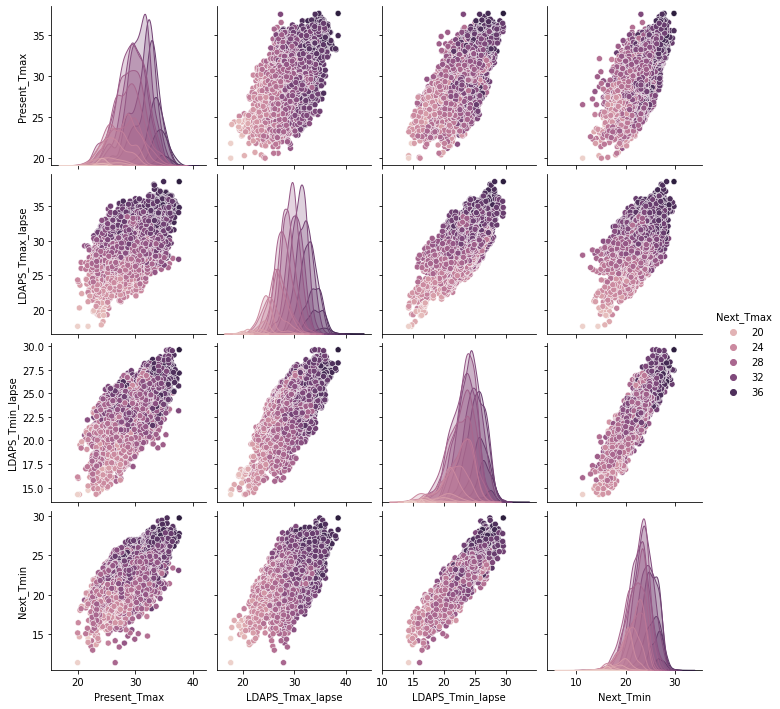

In [22]:
srn.pairplot(df[corr_feat], "Next_Tmax")

In [23]:


def classification_and_fit_model(model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome])
    predictions = model.predict(data[predictors])
    accuracy =metrics.accuracy_score(predictions, data[outcome])
    print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(data):
        train_predictors = data[predictors].iloc[train,:]
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:],
                                data[outcome].iloc[test]))
        print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))
    model.fit(data[predictors],data[outcome])
        



<AxesSubplot:>

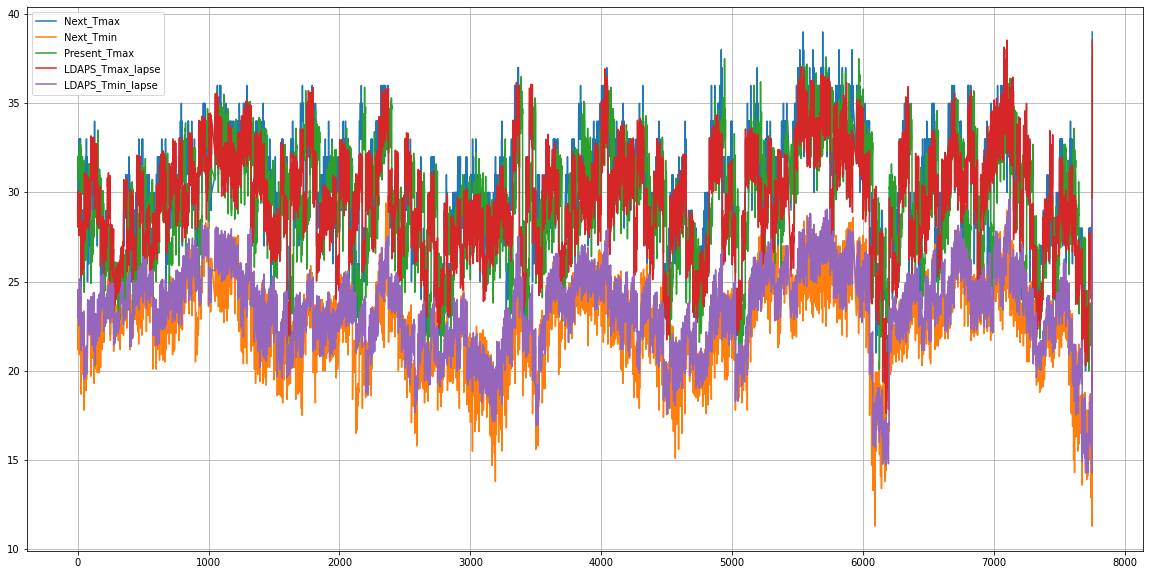

In [140]:
df[['Next_Tmax', 'Next_Tmin', 'Present_Tmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse']].plot(grid=True, figsize=(20,10))

array([[<AxesSubplot:title={'center':'Next_Tmax'}>,
        <AxesSubplot:title={'center':'Next_Tmin'}>],
       [<AxesSubplot:title={'center':'Present_Tmax'}>,
        <AxesSubplot:title={'center':'LDAPS_Tmax_lapse'}>],
       [<AxesSubplot:title={'center':'LDAPS_Tmin_lapse'}>,
        <AxesSubplot:>]], dtype=object)

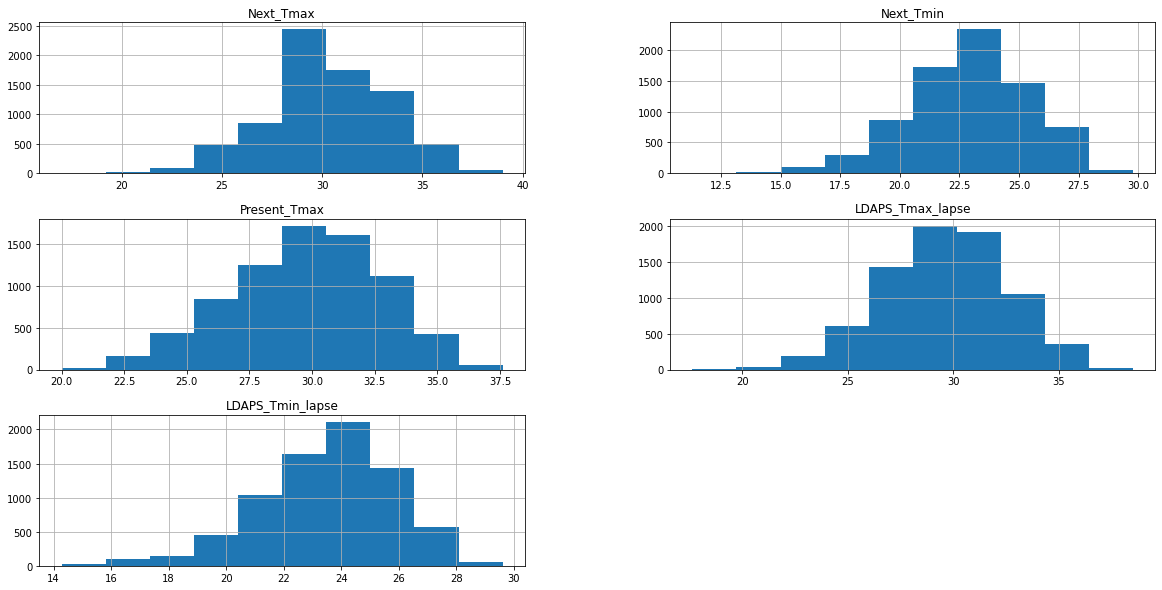

In [141]:
df[['Next_Tmax', 'Next_Tmin', 'Present_Tmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse']].hist(grid=True, figsize=(20,10))

<AxesSubplot:>

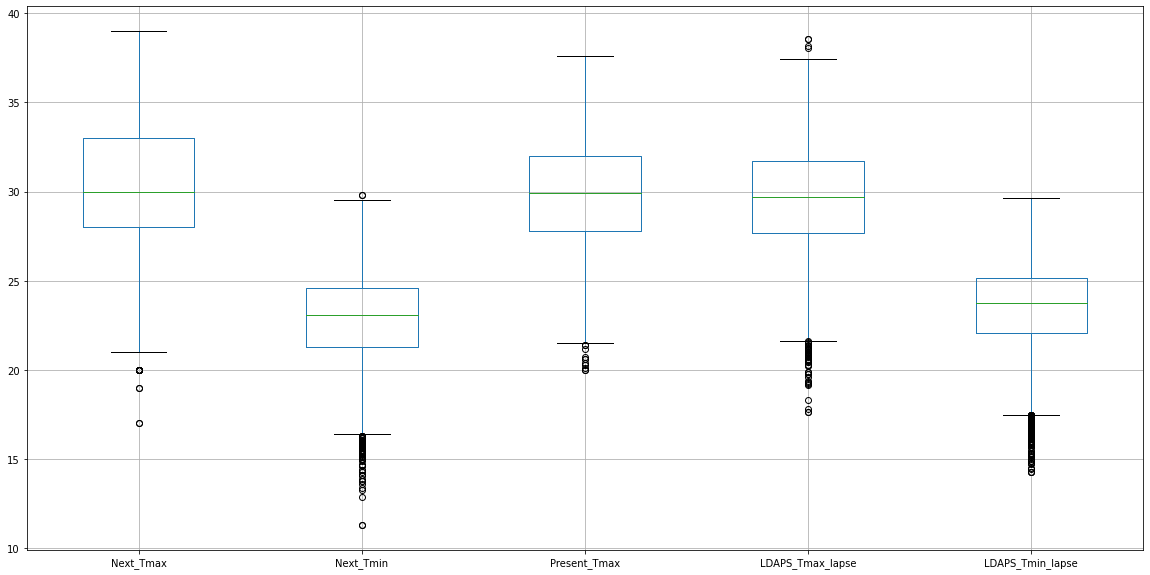

In [139]:
df[['Next_Tmax', 'Next_Tmin', 'Present_Tmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse']].boxplot(grid=True, figsize=(20,10))

In [24]:
predictor = ['Present_Tmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse']

In [25]:
outcome = 'Next_Tmax'

In [92]:
arModelos = []
dctModelo = {'Algoritimo':'', 'Modelo':False}

In [93]:
X_train, X_test, y_train, y_test = train_test_split(df[predictor], df[outcome], test_size=0.3, random_state=1)

# Modelo Linear  : Ridge

In [94]:
from sklearn.linear_model import RidgeClassifier

In [95]:
model = RidgeClassifier()

In [96]:
dctModelo['Algoritimo'] = 'Modelo Linear: Ridge'
dctModelo['Modelo']     = model
arModelos.append(dctModelo.copy())

# Gradiente Descendente Estocástico

In [97]:
model = SGDClassifier()

In [98]:
dctModelo['Algoritimo'] = 'Gradiente Descendente Estocástico'
dctModelo['Modelo']     = model
arModelos.append(dctModelo.copy())

# Árvore de Decisão

In [99]:
model = DecisionTreeClassifier()

In [100]:
dctModelo['Algoritimo'] = 'Árvore de Decisão'
dctModelo['Modelo']     = model
arModelos.append(dctModelo.copy())

# Floresta de Árvores Randômicas

In [101]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=3)

In [102]:
dctModelo['Algoritimo'] = 'Árvores Randômicas'
dctModelo['Modelo']     = model
arModelos.append(dctModelo.copy())

# Classificador Multi Layer Perceptron para Rede Neural

In [103]:
from sklearn.neural_network import MLPClassifier

In [104]:
model = MLPClassifier()

In [105]:
dctModelo['Algoritimo'] = 'Multi Layer Perceptron'
dctModelo['Modelo']     = model
arModelos.append(dctModelo.copy())

# Máquinas de Vetores de Suporte

In [106]:
from sklearn.svm import LinearSVC

In [107]:
model = LinearSVC()

In [108]:
dctModelo['Algoritimo'] = 'Máquinas de Vetores de Suporte'
dctModelo['Modelo']     = model
arModelos.append(dctModelo.copy())

# K Vizinhos mais Próximos

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
model = KNeighborsClassifier()

In [111]:
dctModelo['Algoritimo'] = 'K Vizinhos mais Próximos'
dctModelo['Modelo']     = model
arModelos.append(dctModelo.copy())

# Bayesian 

In [112]:
from sklearn.naive_bayes import GaussianNB

In [113]:
model = GaussianNB()

In [114]:
dctModelo['Algoritimo'] = 'Método Bayesiano'
dctModelo['Modelo']     = model
arModelos.append(dctModelo.copy())

In [115]:
arModelos

[{'Algoritimo': 'Modelo Linear: Ridge', 'Modelo': RidgeClassifier()},
 {'Algoritimo': 'Gradiente Descendente Estocástico',
  'Modelo': SGDClassifier()},
 {'Algoritimo': 'Árvore de Decisão', 'Modelo': DecisionTreeClassifier()},
 {'Algoritimo': 'Árvores Randômicas',
  'Modelo': RandomForestClassifier(max_depth=7, max_features=3, min_samples_split=25)},
 {'Algoritimo': 'Multi Layer Perceptron', 'Modelo': MLPClassifier()},
 {'Algoritimo': 'Máquinas de Vetores de Suporte', 'Modelo': LinearSVC()},
 {'Algoritimo': 'K Vizinhos mais Próximos', 'Modelo': KNeighborsClassifier()},
 {'Algoritimo': 'Método Bayesiano', 'Modelo': GaussianNB()}]

# Benchmark

## Validação Cruzada

In [116]:

for i in arModelos:
    print(i['Algoritimo'])
    classification_and_fit_model(i['Modelo'], df, predictor, outcome)
    print('=' * 50)

Modelo Linear: Ridge
Accuracy : 22.556%
Cross-Validation Score : 22.069%
Cross-Validation Score : 19.499%
Cross-Validation Score : 19.960%
Cross-Validation Score : 18.561%
Cross-Validation Score : 18.551%
Gradiente Descendente Estocástico
Accuracy : 16.772%
Cross-Validation Score : 16.403%
Cross-Validation Score : 13.768%
Cross-Validation Score : 14.361%
Cross-Validation Score : 15.267%
Cross-Validation Score : 13.057%
Árvore de Decisão
Accuracy : 100.000%
Cross-Validation Score : 19.631%
Cross-Validation Score : 17.556%
Cross-Validation Score : 17.479%
Cross-Validation Score : 18.099%
Cross-Validation Score : 17.839%
Árvores Randômicas
Accuracy : 37.760%
Cross-Validation Score : 25.428%
Cross-Validation Score : 25.296%
Cross-Validation Score : 25.165%
Cross-Validation Score : 25.527%
Cross-Validation Score : 24.901%
Multi Layer Perceptron
Accuracy : 26.206%
Cross-Validation Score : 27.009%
Cross-Validation Score : 25.428%
Cross-Validation Score : 25.187%
Cross-Validation Score : 23.91

## Acurácia do Modelo em dados de teste

In [121]:
for i in arModelos:
    print(i['Algoritimo'])
    i['Modelo'].fit(X_train, y_train)
    predictions = i['Modelo'].predict(X_test)
    accuracy = metrics.accuracy_score(predictions, y_test)
    print('Acurácia : %s' % '{0:.3%}'.format(accuracy))
    #print(metrics.classification_report(y_test, i['Modelo'].predict(X_test)))
    print('=' * 50)

Modelo Linear: Ridge
Acurácia : 22.617%
Gradiente Descendente Estocástico
Acurácia : 14.668%
Árvore de Decisão
Acurácia : 24.199%
Árvores Randômicas
Acurácia : 29.600%
Multi Layer Perceptron
Acurácia : 24.901%
Máquinas de Vetores de Suporte
Acurácia : 12.604%
K Vizinhos mais Próximos
Acurácia : 23.671%
Método Bayesiano
Acurácia : 26.702%


## Métricas de avaliação: Precisão, Revocação e Especificidade

In [122]:
for i in arModelos:
    print(i['Algoritimo'])
    print(metrics.classification_report(y_test, i['Modelo'].predict(X_test)))
    print('=' * 50)

Modelo Linear: Ridge
              precision    recall  f1-score   support

          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         7
          22       0.00      0.00      0.00         5
          23       0.00      0.00      0.00        18
          24       0.00      0.00      0.00        73
          25       0.00      0.00      0.00        83
          26       0.21      0.25      0.23       126
          27       0.00      0.00      0.00       126
          28       0.17      0.35      0.23       196
          29       0.00      0.00      0.00       248
          30       0.24      0.54      0.34       295
          31       0.00      0.00      0.00       231
          32       0.25      0.54      0.34       283
          33       0.22      0.40      0.29       238
          34       0.21      0.05      0.08       205
      

## Matriz de Confusão

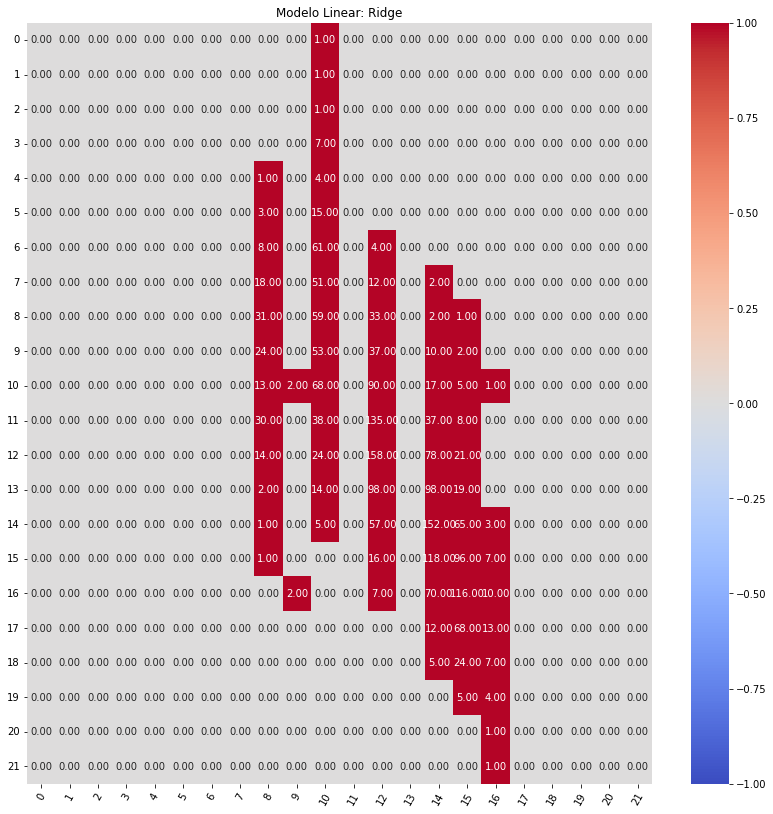

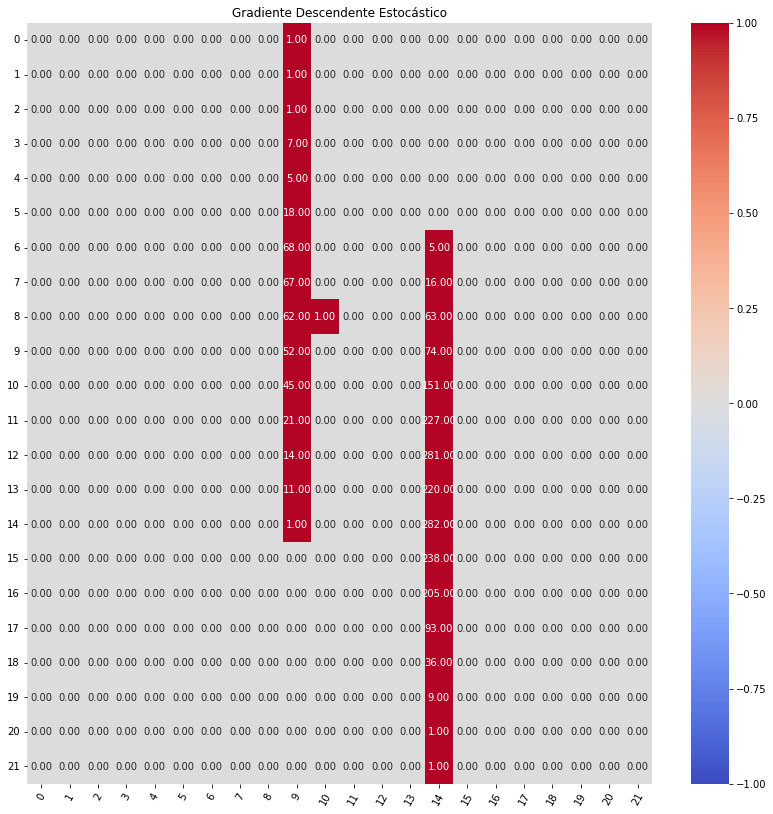

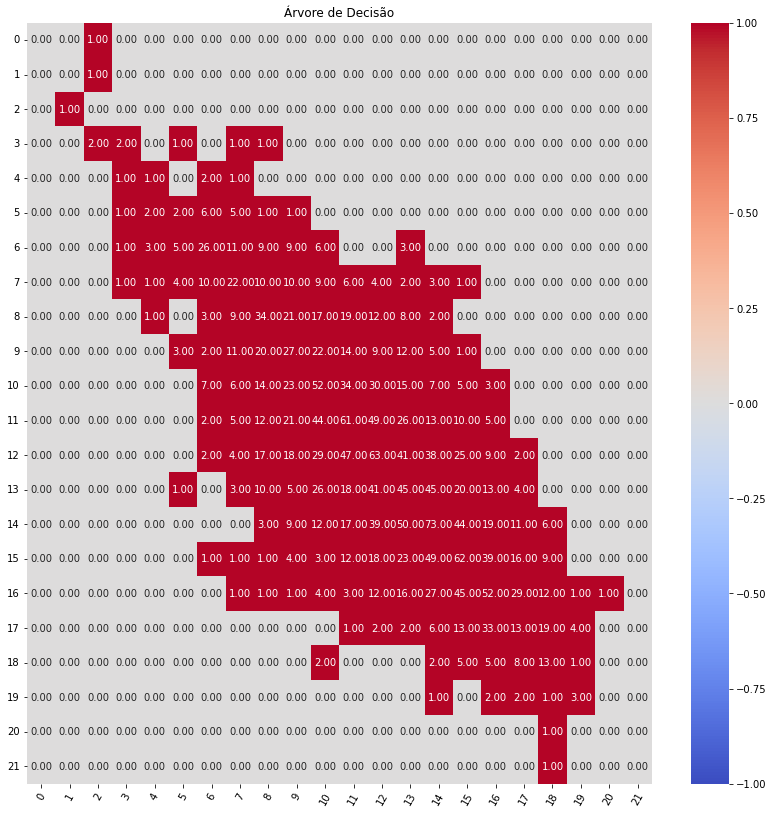

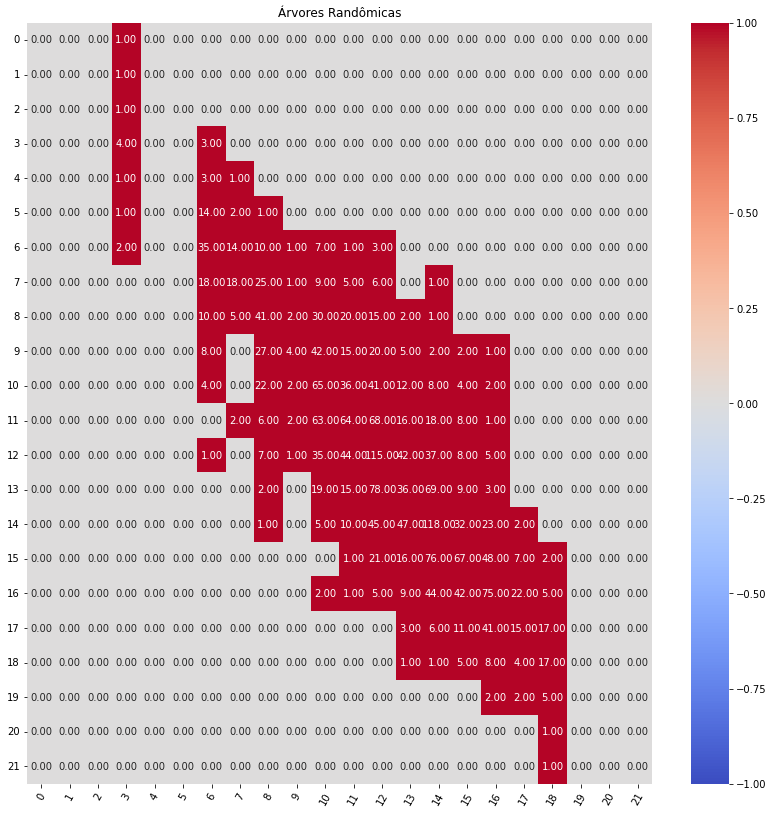

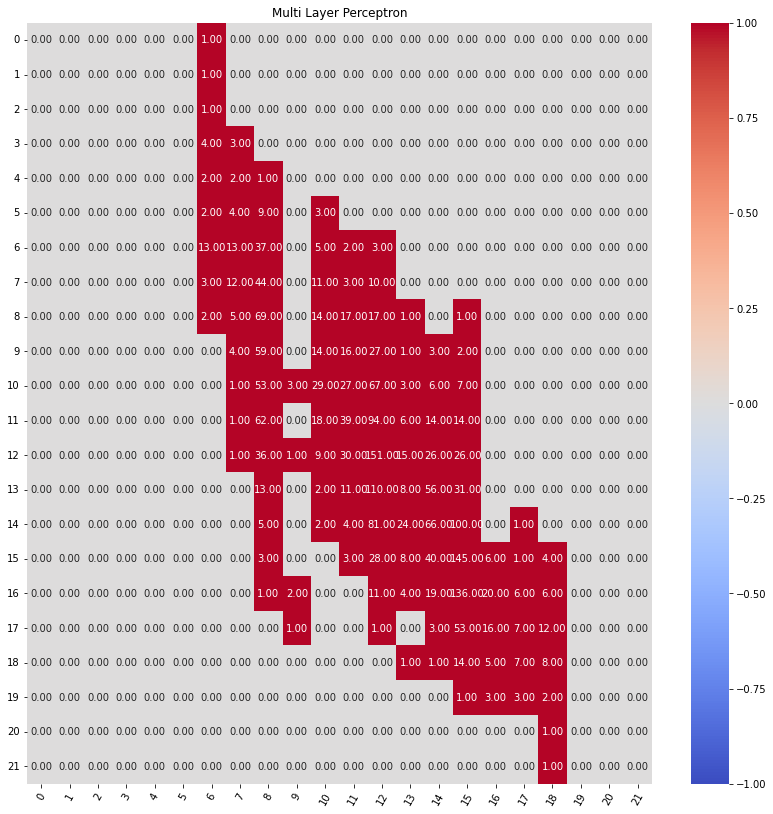

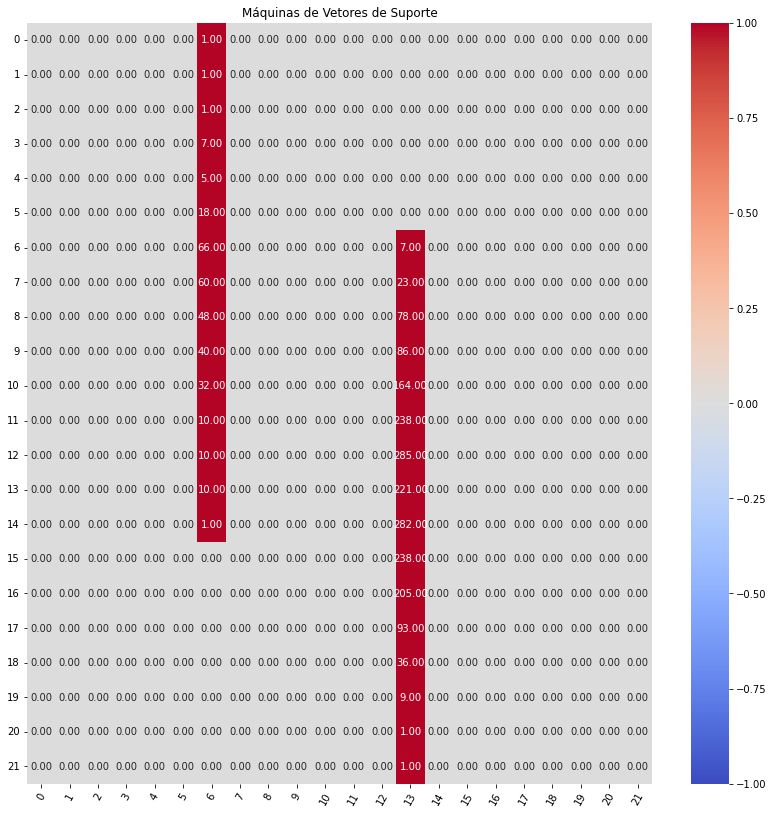

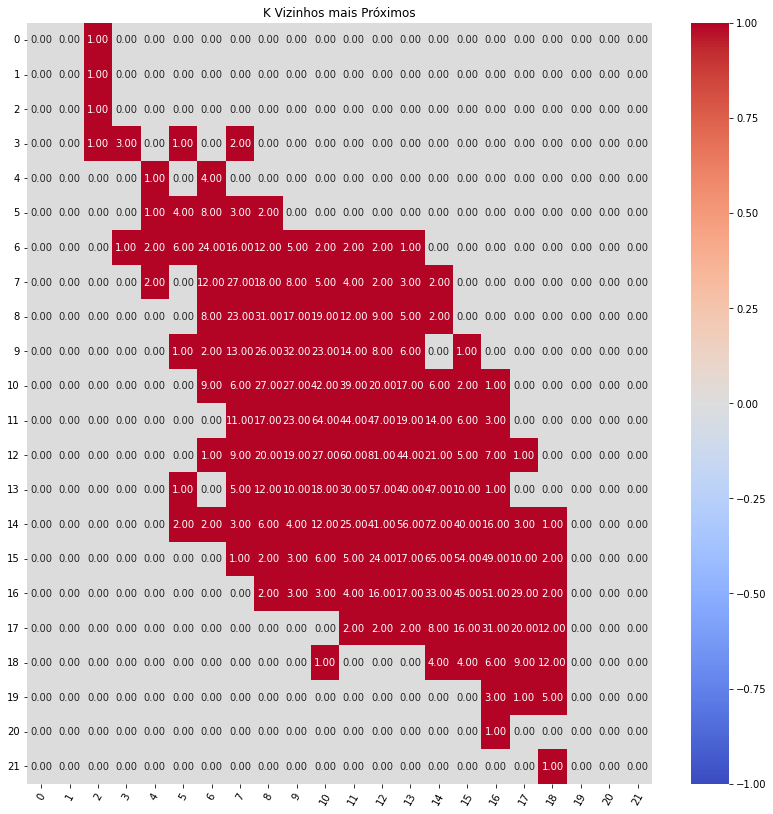

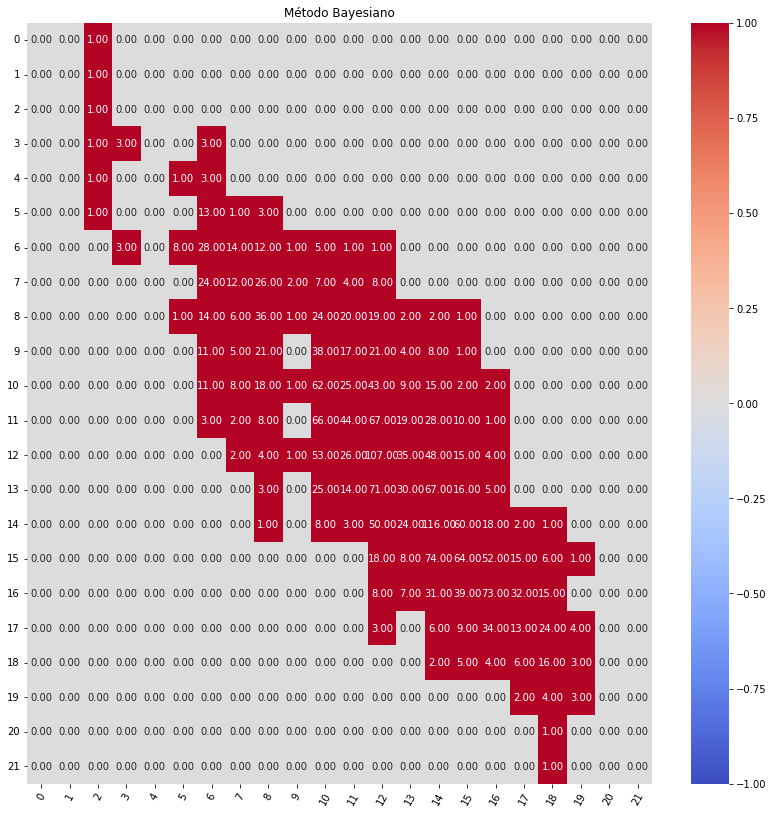

In [126]:
for i in arModelos:
    matrix_pred = metrics.confusion_matrix(y_test, i['Modelo'].predict(X_test))
    f, ax = plt.subplots(figsize = (14,14))
    srn.heatmap(matrix_pred, annot=True, fmt='.2f',
               ax=ax, cmap='coolwarm',vmin=-1,vmax=1)
    plt.xticks(rotation=60)
    plt.yticks(rotation=0)
    plt.title(i['Algoritimo']);

# Considerações

* A variável Next_Tmax apresenta uma distribuição simétrica
* As variáveis 'Present_Tmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse' apresentam uma correlação com a variável Next_Tmax maior ou igual a 60%, estando assim aptas para utilização na criação de um modelo preditivo
* Apesar destas features apresentarem alguns outliers, elas seguem uma mesma tendência, o que me leva a crer que os outliers não devem atrapalhar, a princípio, a construção do modelo preditivo
* Entres os algoritimos testados as Árvores Randômicas a princípio apresentaram o melhor resultado, porém não foi feito nenhum ajuste nos dados nem quanto a parametrização do modelo.
* Um próximo passo seria ajustar os hyperparâmetros para o modelo e se necessário uma nova análise nos dados o que poderia gera por exemplo criação de novas features a partir das existentes com o objetivo de aperfeiçoar o modelo final.
* Neste exemplo foi utilizado como métrica de avaliação a precisão, revocação e especificidade. Existem outras métricas como curva ROC, AUC, Lift que poderão ser utilizadas para análise do modelo.